In [1]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch

In [3]:
dataset = dset.ImageFolder(root="images/",
                           transform=transforms.Compose([
                               transforms.Resize(128),       # 한 축을 128로 조절하고
                               transforms.CenterCrop(128),  # square를 한 후,
                               transforms.ToTensor(),       # Tensor로 바꾸고 (0~1로 자동으로 normalize)
                               transforms.Normalize((0.5, 0.5, 0.5),  # -1 ~ 1 사이로 normalize
                                                    (0.5, 0.5, 0.5)), # (c - m)/s 니까...
                           ]))
dataloader = torch.utils.data.DataLoader(dataset,
                                         batch_size=2,
                                         shuffle=True,
                                         num_workers=8)
for i, data in enumerate(dataloader):
    print(data[0].size())  # input image
    print(data[1])         # class label
    break

torch.Size([2, 3, 128, 128])
tensor([2, 2])


torch.Size([3, 128, 128])
max: 0.7882353067398071, min: -1.0


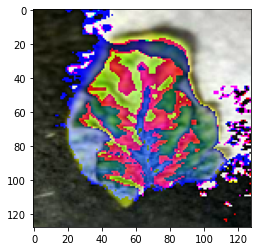

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
to_img = ToPILImage()

for i, data in enumerate(dataloader):
    img = data[0][0,:]
    break
print(img.size())
print("max: {}, min: {}".format(np.max(img.numpy()), np.min(img.numpy())))
plt.imshow(to_img(img))